In [1]:
root_1 = "three/LXY_两快一慢"
root_2 = "three/马爽_两慢一快"
root_3 = "six_seven/FIVELXY1"
root_4 = "six_seven/FIVELXY2"
root_5 = "six_seven/FIVEMS1"
root_6 = "six_seven/FIVEMS2"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from filter import iir_design_filter
from envelope_process import envelope
from variance import window_var
from patternmatch import pattern_match
import os
import copy

In [23]:
# LXY 3
all_features = []
for idx in range(55):
    if (idx + 1) < 10:
        end = '0' + str(idx + 1)
    else:
        end = str(idx + 1)
    path = root_1 + "/" + "LXY_" + end + ".csv"
    data = np.loadtxt(path, delimiter=",")
    filter_module = iir_design_filter()
    filtered_data = filter_module.filter_(raw_data=data)
    upper, _ = envelope(raw_data=filtered_data, n=100).start()
    upper = upper[int(2302 * 0.5):-int(2302 * 0.5)]
    rhythm_number = 3
    end_points, _ = window_var(data=upper, head=rhythm_number).start()
    end_points = np.sort(end_points)
    end_points = end_points[1::2]
    start_points = pattern_match(data=upper, number=rhythm_number).start()
    features = np.append(end_points, start_points)
    features = np.sort(features) - features.min()
    all_features.append(features)

In [34]:
LXY_3 = copy.deepcopy(all_features)

In [36]:
all_features = []
for idx in range(55):
    if (idx + 1) < 10:
        end = '0' + str(idx + 1)
    else:
        end = str(idx + 1)
    path = root_2 + "/" + "MS_" + end + ".csv"
    data = np.loadtxt(path, delimiter=",")
    filter_module = iir_design_filter()
    filtered_data = filter_module.filter_(raw_data=data)
    upper, _ = envelope(raw_data=filtered_data, n=100).start()
    upper = upper[int(2302 * 0.5):-int(2302 * 0.5)]
    rhythm_number = 3
    end_points, _ = window_var(data=upper, head=rhythm_number).start()
    end_points = np.sort(end_points)
    end_points = end_points[1::2]
    start_points = pattern_match(data=upper, number=rhythm_number).start()
    features = np.append(end_points, start_points)
    features = np.sort(features) - features.min()
    all_features.append(features)

In [37]:
MS_3 = copy.deepcopy(all_features)

In [45]:
LXY_data = LXY_3[0]
for idx in range(54):
    if LXY_3[idx + 1].shape[0] ==6:
        LXY_data = np.vstack((LXY_data, LXY_3[idx + 1]))
np.savetxt('LXY_3.csv', LXY_data, fmt='%d')
MS_data = MS_3[0]
for idx in range(54):
    if MS_3[idx + 1].shape[0] ==6:
        MS_data = np.vstack((MS_data, MS_3[idx + 1]))
np.savetxt('MS_3.csv', MS_data, fmt='%d')

In [11]:
all_features = []
for idx in range(20):
    # if (idx + 1) < 10:
    #     end = '0' + str(idx + 1)
    # else:
    end = str(idx + 1)
    path = root_3 + "/" + "FIVELXY1_" + end + ".csv"
    data = np.loadtxt(path, delimiter=",")
    filter_module = iir_design_filter()
    filtered_data = filter_module.filter_(raw_data=data)
    upper, _ = envelope(raw_data=filtered_data, n=100).start()
    upper = upper[int(2302 * 0.5):-int(2302 * 0.5)]
    rhythm_number = 6
    end_points, _ = window_var(data=upper, head=rhythm_number).start()
    end_points = np.sort(end_points)
    end_points = end_points[1::2]
    start_points = pattern_match(data=upper, number=rhythm_number).start()
    features = np.append(end_points, start_points)
    features = np.sort(features) - features.min()
    all_features.append(features)

In [16]:
LXY_6 = copy.deepcopy(all_features)
LXY_data = LXY_6[0]
for idx in range(19):
    if LXY_6[idx + 1].shape[0] == 12:
        LXY_data = np.vstack((LXY_data, LXY_6[idx + 1]))
np.savetxt('LXY_6.csv', LXY_data, fmt='%d')

In [3]:
def extract(num, root, head, rhythm):
    all_features = []
    for idx in range(num):
        # if (idx + 1) < 10:
        #     end = '0' + str(idx + 1)
        # else:
        end = str(idx + 1)
        path = root + "/" + head + end + ".csv"
        data = np.loadtxt(path, delimiter=",")
        filter_module = iir_design_filter()
        filtered_data = filter_module.filter_(raw_data=data)
        upper, _ = envelope(raw_data=filtered_data, n=100).start()
        upper = upper[int(2302 * 0.5):-int(2302 * 0.5)]
        rhythm_number = rhythm
        end_points, _ = window_var(data=upper, head=rhythm_number).start()
        end_points = np.sort(end_points)
        end_points = end_points[1::2]
        start_points = pattern_match(data=upper, number=rhythm_number).start()
        features = np.append(end_points, start_points)
        features = np.sort(features) - features.min()
        all_features.append(features)
    return all_features

In [24]:
all_features = extract(num=15, root=root_4, head='FIVELXY2_', rhythm=7)

In [51]:
LXY_7 = copy.deepcopy(all_features)
LXY_data = []
for idx in range(15):
    if LXY_7[idx].shape[0] == 14:
        LXY_data.append(LXY_7[idx])

LXY_data = np.array(LXY_data, dtype=int)
np.savetxt('LXY_7.csv', LXY_data, fmt='%d')

In [4]:
all_features = extract(num=15, root=root_5, head='FIVEMS1_', rhythm=6)

In [7]:
MS_6 = copy.deepcopy(all_features)
MS_data = []
for idx in range(15):
    if MS_6[idx].shape[0] == 12:
        MS_data.append(MS_6[idx])

MS_data = np.array(MS_data, dtype=int)
np.savetxt('MS_6.csv', MS_data, fmt='%d')

In [10]:
all_features = extract(num=20, root=root_6, head='FIVEMS2_', rhythm=7)

In [11]:
all_features

[array([    0,  1585,  8835, 10529, 13630, 15994, 23091, 24608, 28078,
        30194, 37589, 39783, 43077], dtype=int64),
 array([    0,  2981,  5046, 10937, 12531, 15880, 17887, 19026, 26101,
        26612, 32269, 38447, 40082, 44893], dtype=int64),
 array([    0,  2713,  4777, 10796, 12426, 16168, 18442, 24286, 26322,
        29937, 32076, 39193, 41275, 44432], dtype=int64),
 array([    0,  3002,  5554, 11515, 13571, 16299, 18711, 25010, 26692,
        31466, 33300, 40490, 41771, 46009], dtype=int64),
 array([    0,  2668,  4857,  9960, 11316, 15082, 16616, 22454, 24430,
        28210, 29830, 36131, 37970, 41411], dtype=int64),
 array([    0,  1743,  8342, 10033, 13349, 15511, 21476, 22643, 26309,
        27968, 34407, 35443, 38744], dtype=int64),
 array([    0,  3359,  5491, 14825, 14925, 21039, 21160, 30367, 30470,
        36486, 36941, 44930, 45416, 49482], dtype=int64),
 array([    0,  2103,  9029, 10309, 14785, 16784, 23514, 25009, 29526,
        31647, 39213, 41103, 44796], dty

In [12]:
MS_7 = copy.deepcopy(all_features)
MS_data = []
for idx in range(15):
    if MS_7[idx].shape[0] == 14:
        MS_data.append(MS_7[idx])

MS_data = np.array(MS_data, dtype=int)
np.savetxt('MS_7.csv', MS_data, fmt='%d')
MS_data

array([[    0,  2981,  5046, 10937, 12531, 15880, 17887, 19026, 26101,
        26612, 32269, 38447, 40082, 44893],
       [    0,  2713,  4777, 10796, 12426, 16168, 18442, 24286, 26322,
        29937, 32076, 39193, 41275, 44432],
       [    0,  3002,  5554, 11515, 13571, 16299, 18711, 25010, 26692,
        31466, 33300, 40490, 41771, 46009],
       [    0,  2668,  4857,  9960, 11316, 15082, 16616, 22454, 24430,
        28210, 29830, 36131, 37970, 41411],
       [    0,  3359,  5491, 14825, 14925, 21039, 21160, 30367, 30470,
        36486, 36941, 44930, 45416, 49482],
       [    0,  3723,  5856, 12919, 14761, 19157, 21266, 28663, 29861,
        34822, 36911, 45296, 46661, 50928],
       [    0,  3683,  5872, 13711, 15115, 19671, 21015, 27891, 29215,
        33416, 35370, 42359, 43765, 47719],
       [    0,  3114,  5492, 11849, 13790, 17843, 19972, 27192, 28842,
        33135, 35368, 42665, 44387, 48059],
       [    0,  3416,  5235, 12458, 14409, 17605, 19686, 26035, 27878,
        3

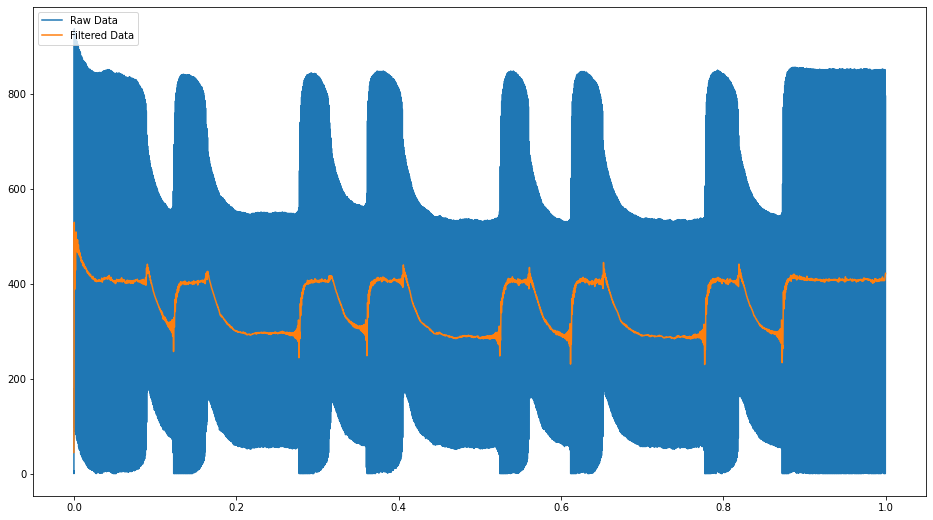

In [15]:
path = root_6 + "/" + "FIVEMS2_" + '1' + ".csv"
data = np.loadtxt(path, delimiter=",")
filter_module = iir_design_filter()
filtered_data = filter_module.filter_(raw_data=data)
filter_module.plot_()

In [4]:
import sklearn.metrics as sm
from classifier import one_class_svm
def add_modify(file_path='gross_name.csv', raw_path='gross_features.csv', data=None, add_data=None, add_name=None):
    name_list = np.loadtxt(file_path, dtype=str)
    if data is None:
        raw_data = np.loadtxt(raw_path)
    else:
        raw_data = data
    if raw_data.shape[0] == 0:
        result = add_data
    else:
        column = raw_data.shape[1] if raw_data.shape[1] > add_data.shape[1] else add_data.shape[1]
        result = np.zeros((raw_data.shape[0] + add_data.shape[0], column))
        result[0:raw_data.shape[0], 0:raw_data.shape[1]] = raw_data
        result[raw_data.shape[0]:, 0:add_data.shape[1]] = add_data
    if data is None and add_name is not None:
        name_list = np.append(name_list, add_name)
        np.savetxt(raw_path, result)
        np.savetxt(file_path, name_list, fmt='%s')
    elif data is None and add_name is None:
        np.savetxt(raw_path, result)
    else:
        return result

In [ ]:
LXY_3 = np.loadtxt('LXY_3.csv')
add_modify(add_data=LXY_3)
LXY_6 = np.loadtxt('LXY_6.csv')
add_modify(add_data=LXY_6)
LXY_7 = np.loadtxt('LXY_7.csv')
add_modify(add_data=LXY_7)

In [20]:
svm = one_class_svm()
svm.train_()
cm = sm.confusion_matrix(svm.y_train, svm.y_pred_train)
cp = sm.classification_report(svm.y_train, svm.y_pred_train)
print("---------------混淆矩阵\n", cm)
print("---------------分类报告\n", cp)

Training Data Accuracy(Positive): 0.8928571428571429
---------------混淆矩阵
 [[ 0  0]
 [ 9 75]]
---------------分类报告
               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         1.0       1.00      0.89      0.94        84

    accuracy                           0.89        84
   macro avg       0.50      0.45      0.47        84
weighted avg       1.00      0.89      0.94        84



C:\Users\Mr.yao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mr.yao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mr.yao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


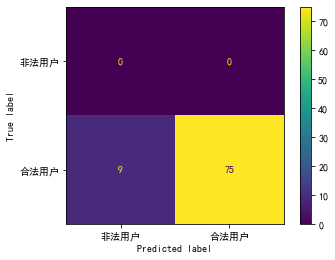

In [21]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
labels = ['非法用户', '合法用户']
disp = sm.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.savefig('合法用户混淆矩阵.png', dpi=400)

In [15]:
def process_features(data):
    length = len(data)
    for idx in range(length):
        data[idx][np.where(data[idx] == 0)[0]] = data[idx][1]
    return data

In [16]:
test_pred = []
MS_3 = np.loadtxt('MS_3.csv')
MS_6 = np.loadtxt('MS_6.csv')
MS_7 = np.loadtxt('MS_7.csv')
MS = add_modify(data=MS_3, add_data=MS_6)
MS = add_modify(data=MS, add_data=MS_7)

MS = process_features(MS)
test_true = -np.ones(len(MS_3) + len(MS_6) + len(MS_7))
for idx in  range(len(MS)):
    test_pred.append(svm.predict_(MS[idx].reshape(1, -1)))

<ipython-input-4-e65d72704b40>:4: UserWarning: loadtxt: Empty input file: "gross_name.csv"
  name_list = np.loadtxt(file_path, dtype=str)


In [17]:
cm = sm.confusion_matrix(test_true, test_pred)
cp = sm.classification_report(test_true, test_pred)
print("---------------非法用户混淆矩阵\n", cm)
print("---------------非法用户分类报告\n", cp)

---------------非法用户混淆矩阵
 [[54 13]
 [ 0  0]]
---------------非法用户分类报告
               precision    recall  f1-score   support

        -1.0       1.00      0.81      0.89        67
         1.0       0.00      0.00      0.00         0

    accuracy                           0.81        67
   macro avg       0.50      0.40      0.45        67
weighted avg       1.00      0.81      0.89        67



C:\Users\Mr.yao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mr.yao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mr.yao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


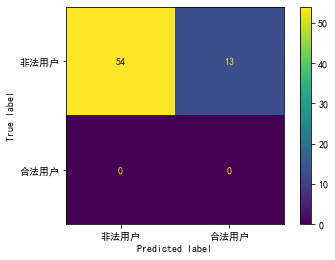

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# labels = ['非法用户', '合法用户']
disp = sm.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.savefig('非法用户混淆矩阵.png', dpi=400)